In [9]:
import numpy as np


#Generates N nodes and returns an array of tuples of their position.
def N_node_gen(N):
    node_list = list()
    for _ in range(N):
        node_list.append(np.array((np.random.random(), np.random.random())))
    return node_list

test_nodes = N_node_gen(5)
test_nodes

[array([0.05400742, 0.63444603]),
 array([0.12860957, 0.06762378]),
 array([0.35429638, 0.26400617]),
 array([0.45346923, 0.52606854]),
 array([0.88496425, 0.28261421])]

In [26]:
import numpy as np

#Returns adjacency matrix of the generated graph

def adj_mat_gen(node_list, R):
    N = len(node_list)
    adj_mat = np.zeros((N, N), dtype=np.float64)
    for i in range(N):
        for j in range(i+1, N):
            dist = np.linalg.norm(node_list[i]-node_list[j])
            if dist < R:
                adj_mat[i, j] = 1 - dist/R
                adj_mat[j, i] = 1 - dist/R
    return adj_mat

test_adj_mat = adj_mat_gen(test_nodes, 0.5)

test_adj_mat

array([[0.        , 0.        , 0.04627228, 0.17219468, 0.        ],
       [0.        , 0.        , 0.40166704, 0.        , 0.        ],
       [0.04627228, 0.40166704, 0.        , 0.43960038, 0.        ],
       [0.17219468, 0.        , 0.43960038, 0.        , 0.00912571],
       [0.        , 0.        , 0.        , 0.00912571, 0.        ]])

In [29]:
#Produces the matrix W(i)

def W_i_gen(i, adj_mat, gamma):
    i -= 1
    W_i = np.zeros(np.shape(adj_mat), dtype=np.float64)
    N = np.shape(adj_mat)[0]
    for j in range(N):
        if adj_mat[i, j]:
            val = adj_mat[i, j].item()
            W_i[j, j] = gamma * val
            W_i[j, i] = 1 - gamma * val
        else:
            W_i[j, j] = 1
    return W_i

test_W_1 = W_i_gen(1, test_adj_mat, 0.5)

test_W_1

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.97686386, 0.        , 0.02313614, 0.        , 0.        ],
       [0.91390266, 0.        , 0.        , 0.08609734, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [30]:
#A single step of the simulation

def update_step(x, adj_mat, gamma):
    N = len(x)
    i = np.random.randint(N, size=1)
    W_i = W_i_gen(i, adj_mat, gamma)
    return np.matmul(W_i, x)

test_x = np.random.random(size=5)
update_step(test_x, test_adj_mat, 0.5)

array([0.61735218, 0.51062788, 0.74681145, 0.10324995, 0.102715  ])

In [53]:
def simulate(x_0, adj_mat, gamma, time):
    x_list = [x_0]
    for t in range(1, time+1):
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
    return x_list

test_x = np.random.random(size=5)
test_simulation = simulate(test_x, test_adj_mat, 0.5, 10)
test_simulation

[array([0.99257255, 0.04628024, 0.43924362, 0.73224156, 0.16080121]),
 array([0.99257255, 0.04628024, 0.97977065, 0.97015874, 0.16080121]),
 array([0.99257255, 0.04628024, 0.97977065, 0.16449419, 0.16080121]),
 array([0.98006684, 0.79229448, 0.97977065, 0.80057273, 0.16080121]),
 array([0.98006684, 0.79229448, 0.97977065, 0.16372039, 0.16080121]),
 array([0.9797775 , 0.94211915, 0.97977065, 0.80040265, 0.16080121]),
 array([0.81584635, 0.94211915, 0.83982777, 0.80040265, 0.79748424]),
 array([0.81584635, 0.94211915, 0.83982777, 0.79749756, 0.79748424]),
 array([0.81584635, 0.94211915, 0.92157561, 0.79749756, 0.79748424]),
 array([0.91912945, 0.92570145, 0.92157561, 0.89430323, 0.79748424]),
 array([0.89644071, 0.92570145, 0.90029771, 0.89430323, 0.89386146])]

In [45]:
#The following code investigates convergence in expectation to the initial value

simulate_num = 1000
N = 50
R = 2*np.sqrt(np.log(N)/N)
time = 10000
gamma = 0.5

node_list = N_node_gen(N)
adj_mat = adj_mat_gen(node_list, R)

x_0 = np.random.random(N)
desired_x = 1/N * np.sum(x_0) * np.ones(N)

x = np.zeros(N)
for _ in range(simulate_num):
    x += simulate(x_0, adj_mat, gamma, time = 100)[-1]
x /= simulate_num

print(np.linalg.norm(x - desired_x))

0.0794229343524676


x_list done


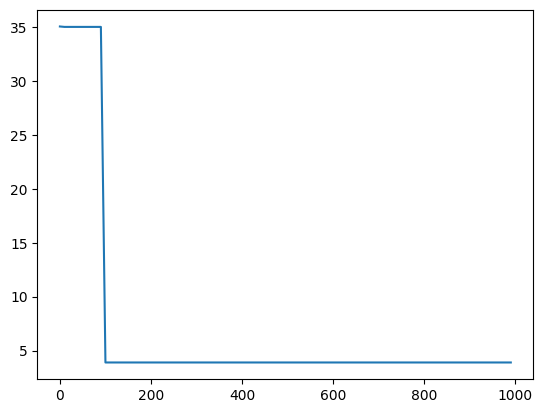

In [69]:
#Plots convergence in expectation as t goes to infty

import matplotlib.pyplot as plt

simulate_num = 100
N = 50
R = 2*np.sqrt(np.log(N)/N)
time = 1000
gamma = 0.5

t_list = [10*t for t in range(0, 100, 1)]
x_list = [np.zeros(N) for _ in range(0, 100, 1)]

for _ in range(simulate_num):
    x_obs = simulate(x_0, adj_mat, gamma, time)
    for t in t_list:
        x_list[t//100] += x_obs[t]

for _ in range(len(x_list)):
    x_list[_] /= simulate_num
    x_list[_] -= desired_x

x_plot_list = [np.linalg.norm(_) for _ in x_list]

print("x_list done")

plt.plot(t_list, x_plot_list)

In [71]:
print(x_plot_list[-2])

3.901072163169155
